In [1]:
pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#Kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 802M/812M [00:07<00:00, 182MB/s]
100% 812M/812M [00:09<00:00, 90.9MB/s]


In [5]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [6]:
#Extracting The Compressed Files Dataset

from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset , 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [7]:
#Extracting The Compressed Files Dataset

from zipfile import ZipFile

dataset = '/content/train.zip'
with ZipFile(dataset , 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [12]:
import os

# Count The Number of Files in Train Folder
path , dirs , files = next(os.walk('/content/train'))
file_count = len(files)
print('The No of images are' , file_count)
print('The Path of Images is ' , path)


The No of images are 25000
The Path of Images is  /content/train




```
# Printing the names of Images

```



In [13]:
file_names= os.listdir('/content/train/')
print(file_names)

['dog.4481.jpg', 'cat.12182.jpg', 'cat.6010.jpg', 'cat.5883.jpg', 'dog.41.jpg', 'cat.5648.jpg', 'cat.2479.jpg', 'dog.3280.jpg', 'cat.8408.jpg', 'dog.8935.jpg', 'dog.9348.jpg', 'cat.7740.jpg', 'cat.7678.jpg', 'dog.2560.jpg', 'cat.11032.jpg', 'cat.12217.jpg', 'dog.12225.jpg', 'dog.4386.jpg', 'dog.3939.jpg', 'dog.4463.jpg', 'cat.8736.jpg', 'cat.11561.jpg', 'dog.4859.jpg', 'cat.3988.jpg', 'cat.12478.jpg', 'cat.7036.jpg', 'cat.5431.jpg', 'dog.5217.jpg', 'cat.8279.jpg', 'dog.3902.jpg', 'cat.9657.jpg', 'dog.3930.jpg', 'dog.3306.jpg', 'dog.3505.jpg', 'cat.4981.jpg', 'cat.8515.jpg', 'cat.9235.jpg', 'cat.11650.jpg', 'dog.7835.jpg', 'dog.2876.jpg', 'dog.10496.jpg', 'cat.8428.jpg', 'dog.9307.jpg', 'dog.1532.jpg', 'dog.791.jpg', 'cat.5743.jpg', 'cat.4493.jpg', 'dog.7735.jpg', 'dog.10681.jpg', 'dog.11857.jpg', 'cat.1156.jpg', 'cat.1745.jpg', 'dog.7110.jpg', 'dog.8940.jpg', 'cat.1357.jpg', 'cat.6170.jpg', 'cat.7688.jpg', 'dog.1826.jpg', 'dog.8915.jpg', 'cat.9137.jpg', 'dog.4795.jpg', 'cat.7371.jpg', 

The Required Libraries importing the dependencies


In [14]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the Images of Dogs and Cats

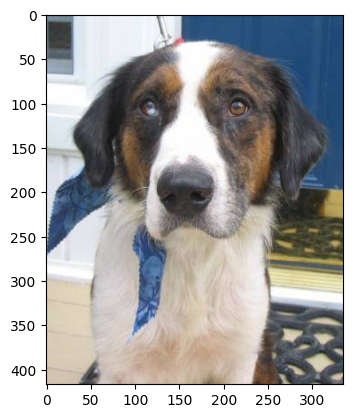

In [20]:
# display the Dog Image
img = mpimg.imread('/content/train/dog.4481.jpg')
imgplt = plt.imshow(img)
plt.show()

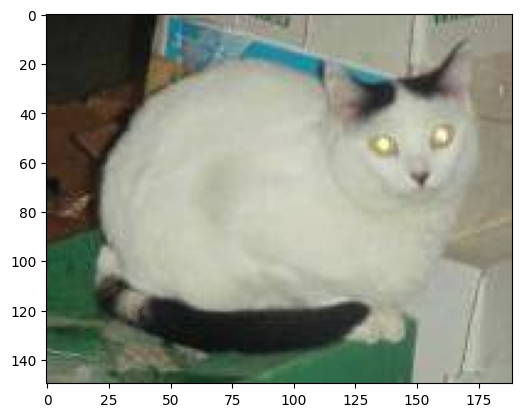

In [21]:
#display the Image of the Cat
img = mpimg.imread('/content/train/cat.5883.jpg')
imgplt = plt.imshow(img)
plt.show()

The Below Code is the code to print the Number of Cats and Dogs


In [25]:
file_names = os.listdir('/content/train')

cat_num = 0
dog_num = 0
for i in range(len(file_names)):
  if(file_names[i][:3]) == 'dog':
    dog_num +=1
  else:
    cat_num +=1
print("The Dogs are" , dog_num)
print("The Cats are" , cat_num)


The Dogs are 12500
The Cats are 12500


Here in Our case the Images are of different shapes and sizes we need to make them into equal shapes and sizes
Convert the images into gray scale images


Resizing all The Images


In [26]:
os.mkdir('/content/image resized')

In [29]:
original_folder = "/content/train/"
resized_folder = "/content/image resized/"

for i in range(2000):
  file_name = os.listdir(original_folder)[i]
  img_path = original_folder + file_name

  img = Image.open(img_path)
  img = img.resize((224 , 224))
  img = img.convert('RGB')

  newImgPath = resized_folder + file_name
  img.save(newImgPath)



Display Resized Images


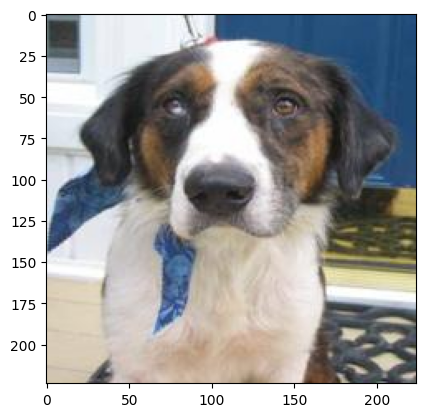

In [30]:
# display the Dog Image
img = mpimg.imread('/content/image resized/dog.4481.jpg')
imgplt = plt.imshow(img)
plt.show()

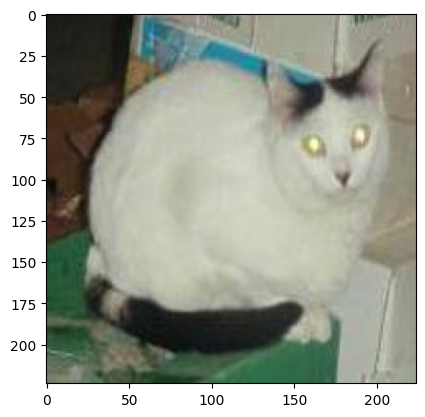

In [31]:
#display the Image of the Cat
img = mpimg.imread('/content/image resized/cat.5883.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating Labells for Resized Images of Dogs and Cats **

Cat --> 0
Dog --> 1

In [64]:
# Creating a for loop to assign labels for this images
file_names = os.listdir('/content/image resized/')

labels = []
for i in range(2000):
  file_name = file_names[i]
  label = file_name[0:3]
  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)


In [65]:
print(file_names[0:5])
print(len(file_names))

['dog.4481.jpg', 'cat.12182.jpg', 'cat.6010.jpg', 'cat.5883.jpg', 'dog.41.jpg']
2000


In [66]:
print(file_names[0:5])
print((labels)[0:5])
print(len(file_names))

['dog.4481.jpg', 'cat.12182.jpg', 'cat.6010.jpg', 'cat.5883.jpg', 'dog.41.jpg']
[1, 0, 0, 0, 1]
2000


Counting The Images of Dogs and Cats out of 2000 Images

In [67]:
#counting The Images of Dogs and Cats out of 2000 Images
values , count = np.unique(labels , return_counts=True)
print(values)
print(count)

[0 1]
[ 974 1026]


In [68]:
cat_num = 0
dog_num = 0
for i in range(len(file_names)):
  if(file_names[i][:3]) == 'dog':
    dog_num +=1
  else:
    cat_num +=1
print("The Dogs are" , dog_num)
print("The Cats are" , cat_num)


The Dogs are 1026
The Cats are 974


Converting all The Resized Images to Numpy Arrays check for extension of Images


In [69]:
import cv2
import glob

In [75]:
import os
import glob
import cv2
import numpy as np

image_directory = '/content/image resized'
image_extension = ['png', 'jpg']

image_directory = os.path.join(image_directory, '')

# Iterate through each file in the directory
files = []
for filename in os.listdir(image_directory):
    # Construct the full file path
    file_path = os.path.join(image_directory, filename)

    # Check if the item is a file (not a directory) and has the desired extension
    if os.path.isfile(file_path) and filename.lower().endswith(tuple(image_extension)):
        # Append the file path to the list
        files.append(file_path)

# Print the list of files
print("List of files:", files)

# Load images using OpenCV
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

# Now you can use dog_cat_images as needed


List of files: ['/content/image resized/dog.4481.jpg', '/content/image resized/cat.12182.jpg', '/content/image resized/cat.6010.jpg', '/content/image resized/cat.5883.jpg', '/content/image resized/dog.41.jpg', '/content/image resized/cat.5648.jpg', '/content/image resized/cat.2479.jpg', '/content/image resized/dog.3280.jpg', '/content/image resized/cat.8408.jpg', '/content/image resized/dog.8935.jpg', '/content/image resized/dog.9348.jpg', '/content/image resized/cat.7740.jpg', '/content/image resized/cat.7678.jpg', '/content/image resized/dog.2560.jpg', '/content/image resized/cat.11032.jpg', '/content/image resized/cat.12217.jpg', '/content/image resized/dog.12225.jpg', '/content/image resized/dog.4386.jpg', '/content/image resized/dog.3939.jpg', '/content/image resized/dog.4463.jpg', '/content/image resized/cat.8736.jpg', '/content/image resized/cat.11561.jpg', '/content/image resized/dog.4859.jpg', '/content/image resized/cat.3988.jpg', '/content/image resized/cat.12478.jpg', '/con

In [76]:
print(dog_cat_images)

[[[[139 127 109]
   [127 115  97]
   [112  99  83]
   ...
   [128  80  38]
   [129  81  39]
   [130  82  40]]

  [[151 139 121]
   [145 135 117]
   [143 130 114]
   ...
   [125  77  35]
   [126  78  36]
   [127  79  37]]

  [[143 133 116]
   [143 135 118]
   [150 139 125]
   ...
   [123  75  33]
   [123  75  33]
   [124  76  34]]

  ...

  [[175 197 209]
   [175 197 209]
   [175 197 209]
   ...
   [144 147 151]
   [121 125 130]
   [ 97 101 106]]

  [[173 197 209]
   [173 197 209]
   [173 197 209]
   ...
   [116 117 115]
   [108 111 109]
   [104 107 105]]

  [[173 197 209]
   [173 197 209]
   [173 197 209]
   ...
   [106 106 100]
   [ 99 101  95]
   [ 99 101  95]]]


 [[[ 66  67  65]
   [ 68  69  67]
   [ 66  67  65]
   ...
   [195 187 188]
   [193 186 189]
   [221 214 217]]

  [[ 74  75  73]
   [ 79  80  78]
   [ 81  82  80]
   ...
   [193 185 186]
   [200 193 196]
   [235 228 231]]

  [[ 74  75  73]
   [ 80  81  79]
   [ 84  85  83]
   ...
   [192 184 185]
   [210 203 206]
   [253 246

In [77]:
print(dog_cat_images.shape)

# (number of image , width , height , RGB = 3 , Grey Scale Image = 1)

(2000, 224, 224, 3)


Dividing the Dataset into Train Test and Split

In [82]:
X = dog_cat_images
Y =  np.asarray(labels)


# applying Train Test Split
# random_state = 2 will make the split same every time

# X_train -> images
# y_train -> labels 0 or 1 corresponding to X_train

X_train , X_test , Y_train , Y_text = train_test_split(X , Y , test_size = 0.2 , random_state=2)


In [83]:
print(X.shape , X_train.shape , X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training Images
400 --> Testing Images


In [86]:
#scaling the Data
# standardizing or scaling the Image between 0 and 1

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

Building Our Neural Network Pretrained Model Called as Mobile Net

We Get the Pretrained Model from Tensor FLow


In [87]:
import tensorflow as tf
import tensorflow_hub as hub

In [88]:
mobilenet_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [90]:
pretrained_model = hub.KerasLayer(mobilenet_model , input_shape = (224 , 224 , 3) , trainable = False)

In [94]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

In [95]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [97]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['acc']
)

In [98]:
model.fit(X_train_scaled , Y_train , epochs = 5)

Epoch 1/5
50/50 [==============================] - 71s 1s/step - loss: 0.2176 - acc: 0.9106
Epoch 2/5
50/50 [==============================] - 74s 1s/step - loss: 0.0721 - acc: 0.9762
Epoch 3/5
50/50 [==============================] - 77s 2s/step - loss: 0.0569 - acc: 0.9819
Epoch 4/5
50/50 [==============================] - 84s 2s/step - loss: 0.0436 - acc: 0.9875
Epoch 5/5
50/50 [==============================] - 96s 2s/step - loss: 0.0385 - acc: 0.9894


In [101]:
score , acc = model.evaluate(X_test_scaled , Y_text)
print("Test Loss = ", score )
print("Test Accuracy = " , acc)

13/13 [==============================] - 18s 1s/step - loss: 0.0604 - acc: 0.9725
Test Loss =  0.060386352241039276
Test Accuracy =  0.9725000262260437


Predictive System

In [103]:
input_image_path = "/content/train"

# First Displaying the Image
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

# Resize The Image Here
input_image_resize = cv2.resize(input_image , (224,224))

# how we standardize the image
input_image_scaled = input_image_resize / 255

#  only for one image beacuse making prediction for one image
# 1,224,224,3
image_reshaped = np.reshape(input_image_scaled , [1,224,224,3])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('The Image is a cat')
else:
  print('The image represents a Dog')

KeyboardInterrupt: Interrupted by user